In [16]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from googletrans import Translator
import langdetect
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
%store -r final_df
%store -r y_1
%store -r y_2
%store -r y_3
%store -r y_4
%store -r y_5
%store -r y_6
%store -r y_7

In [3]:
final_df = final_df
y_1 = y_1
y_2 = y_2
y_3 = y_3
y_4 = y_4
y_5 = y_5
y_6 = y_6
y_7 = y_7

In [4]:
%store -d final_df
%store -d y_1
%store -d y_2
%store -d y_3
%store -d y_4
%store -d y_5
%store -d y_6
%store -d y_7

In [5]:
X= final_df

vectorizer1 = TfidfVectorizer(max_features=1500, ngram_range=(1,3))    
tfidf_1 = vectorizer1.fit_transform(X['description'])
df_tfidf = pd.DataFrame(tfidf_1.toarray(), columns=['description_' + x for x in vectorizer1.get_feature_names()])
X = pd.concat([X, df_tfidf], axis=1)
X.drop(columns=['description'], axis=1, inplace=True)
    
vectorizer2 = TfidfVectorizer(max_features=1500, ngram_range=(1,3)) 
tfidf_2 = vectorizer2.fit_transform(X['neighborhood_overview'])
df_tfidf = pd.DataFrame(tfidf_2.toarray(), columns=['neihborhood_overview_' + x for x in vectorizer2.get_feature_names()])
X = pd.concat([X, df_tfidf], axis=1)
X.drop(columns=['neighborhood_overview'], axis=1, inplace=True)
    
vectorizer3 = TfidfVectorizer(max_features=1500, ngram_range=(1,3)) 
tfidf_3 = vectorizer3.fit_transform(X['translated'])
df_tfidf = pd.DataFrame(tfidf_3.toarray(), columns=['translated_' + x for x in vectorizer3.get_feature_names()])
X = pd.concat([X, df_tfidf], axis=1)
X.drop(columns=['translated'], axis=1, inplace=True)

/Users/haneeshsolasa/miniforge3/envs/env_final/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/haneeshsolasa/miniforge3/envs/env_final/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/haneeshsolasa/miniforge3/envs/env_final/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
y = y_1

model_1 = KNeighborsRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'n_neighbors': [5,10,20,50,100,500]}


grid_search_ridge = GridSearchCV(model_1, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',verbose = 2,return_train_score=True)

grid_search_ridge.fit(X_train, Y_train)

print(f"Best regularization: {grid_search_ridge.best_estimator_.n_neighbors}")
results_df3 = pd.DataFrame.from_dict(grid_search_ridge.cv_results_)
results_df3.to_csv('GridSearchCV_KNN_1500.csv', index=False)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ......................................n_neighbors=5; total time=   0.6s
[CV] END ......................................n_neighbors=5; total time=   0.6s
[CV] END ......................................n_neighbors=5; total time=   0.6s
[CV] END ......................................n_neighbors=5; total time=   0.6s
[CV] END ......................................n_neighbors=5; total time=   0.6s
[CV] END .....................................n_neighbors=10; total time=   0.6s
[CV] END .....................................n_neighbors=10; total time=   0.6s
[CV] END .....................................n_neighbors=10; total time=   0.6s
[CV] END .....................................n_neighbors=10; total time=   0.6s
[CV] END .....................................n_neighbors=10; total time=   0.7s
[CV] END .....................................n_neighbors=20; total time=   0.6s
[CV] END .....................................n_n

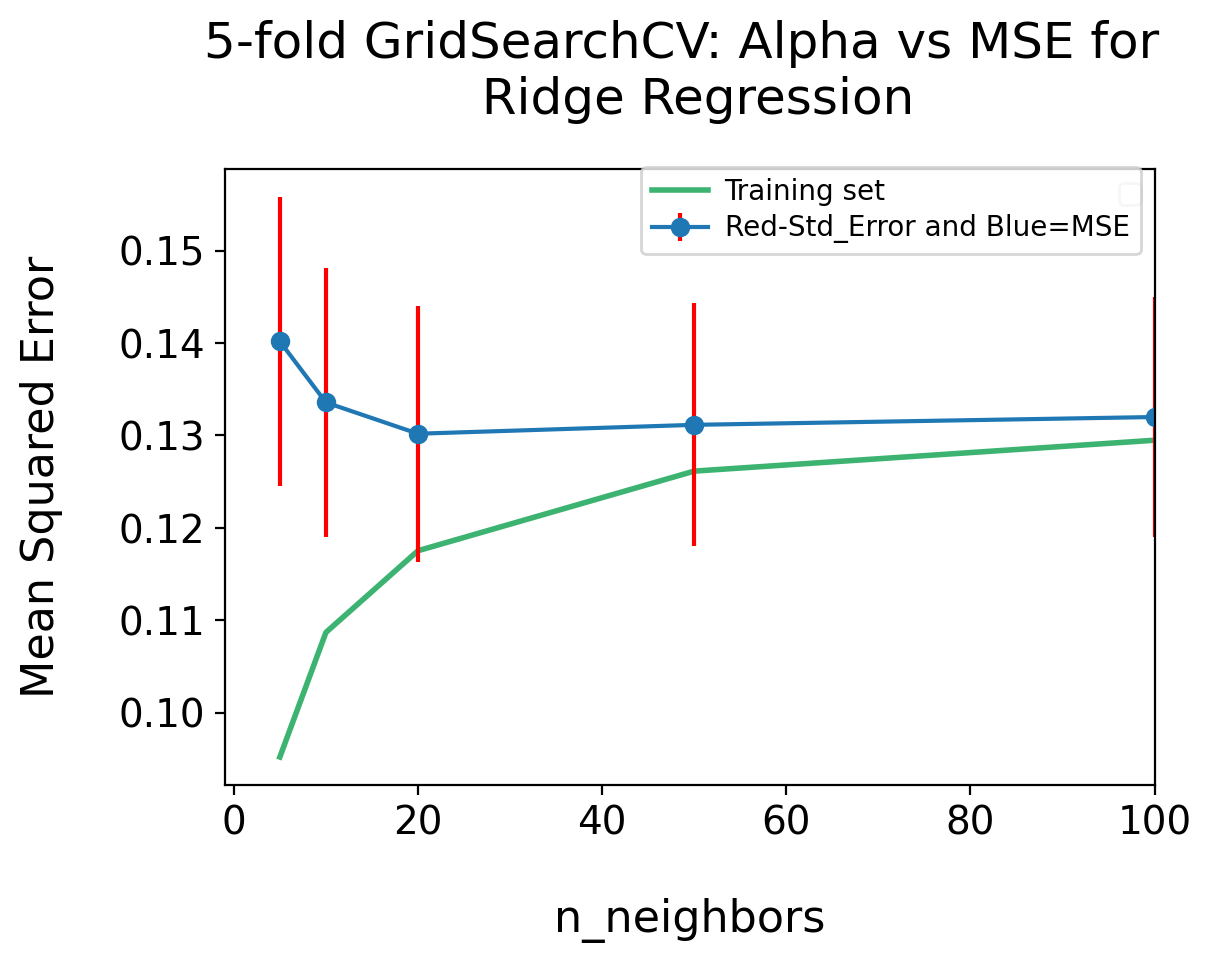

In [19]:
plt.figure(figsize=(6,4), dpi=200)
results_df3['param_n_neighbors'] = results_df3['param_n_neighbors'].astype('int')
acc = -1*results_df3["mean_train_score"]
val_acc = -1*results_df3["mean_test_score"]
mean = -1*results_df3['mean_test_score']
std = results_df3['std_test_score']



epochs = range(len(acc))
plt.plot(results_df3["param_n_neighbors"], acc, label='Training set', color='mediumseagreen', linestyle='-', lw=2)
#plt.plot(results_df3["param_n_neighbors"], val_acc, label='Validation set', color='orangered', linestyle='--', lw=2)
plt.errorbar(results_df3["param_n_neighbors"],mean,yerr=std,ecolor='red',fmt='-o',label = 'Red-Std_Error and Blue=MSE')
plt.title('5-fold GridSearchCV: Alpha vs MSE for \n Ridge Regression', fontsize=18, pad=20)
plt.legend([])



plt.xlabel('n_neighbors', fontsize=16, labelpad=20)
plt.ylabel('Mean Squared Error', fontsize=16, labelpad=20)
plt.xlim([-1,100])
plt.tick_params(labelsize=14)



plt.figlegend(loc='upper right', ncol=1, labelspacing=0.3,
              title_fontsize=12, fontsize=10, bbox_to_anchor=(0.9, 0.9),
              handletextpad=0.6, frameon=True)
plt.show()

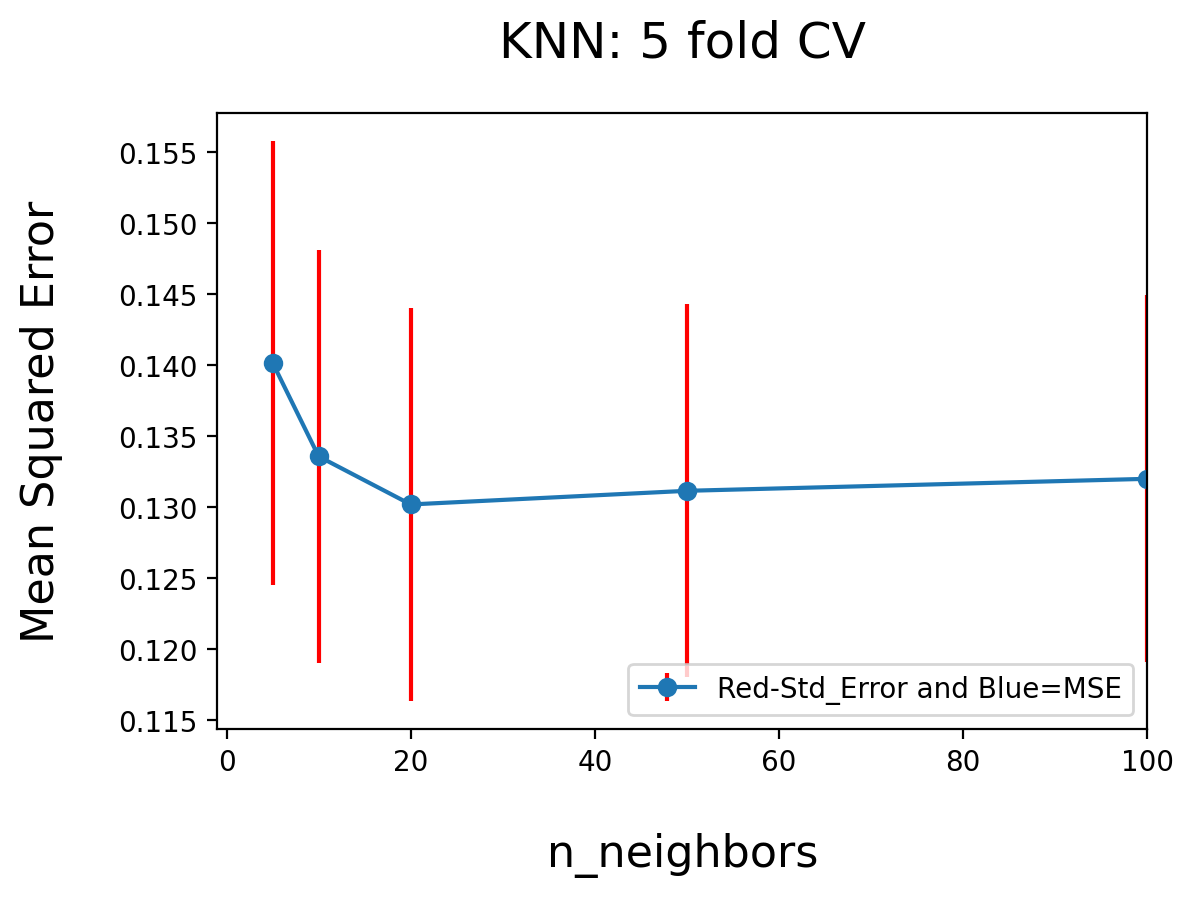

In [12]:
mean = -1*results_df3['mean_test_score']
std = results_df3['std_test_score']
plt.figure(figsize=(6,4), dpi=200)
plt.errorbar(results_df3["param_n_neighbors"],mean,yerr=std,ecolor='red',fmt='-o')
plt.legend(["Red-Std_Error and Blue=MSE"],loc=4) 
plt.xlim([-1,100])
plt.xlabel('n_neighbors', fontsize=16, labelpad=20)
plt.ylabel('Mean Squared Error', fontsize=16, labelpad=20)
plt.title('KNN: 5 fold CV', fontsize=18, pad=20)
plt.show()

## Model 1

In [17]:
y = y_1
KNN1 = KNeighborsRegressor(n_neighbors = 20)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, y, test_size=0.2, random_state=42)
KNN1.fit(X1_train,Y1_train)
Y1_pred = KNN1.predict(X1_test)
score1 = mean_squared_error(Y1_pred,Y1_test)
mae1 = mean_absolute_error(Y1_pred,Y1_test)

In [18]:
print(score1)
print(mae1)

0.15678176537218358
0.2194867429397249


## Model 2